<a href="https://colab.research.google.com/github/sultanmr/sentimental-analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About project: Hospitality & Service. Enhancing Restaurant Service Through Sentiment Analysis of Customer Reviews

## Industry Overview & Business Context
notion image
In the restaurant industry, customer satisfaction is a key driver of success. A single negative review can influence potential diners, while positive feedback builds trust and attracts more customers. With the rise of online reviews, restaurant owners need data-driven insights to understand customer sentiment and improve service accordingly.
A restaurant has collected a dataset of customer reviews to analyze sentiment and identify patterns that can help improve the overall dining experience. By leveraging sentiment analysis, the restaurant aims to gain deeper insights into customer satisfaction, address negative feedback proactively, and enhance service quality.
## Project Scope & Dataset
The dataset contains customer reviews along with a binary sentiment label indicating whether the customer liked or did not like both the food and the overall experience. The goal of this project is to build a machine learning model that accurately predicts the sentiment of a given review.
## Dataset Details
The dataset consists of two columns:
*   Review – The actual text of the review written by a customer.
*   Liked – A binary target variable:
   *   1: The customer liked the food.
   *   0: The customer did not like the food.
The dataset can be downloaded from here.
## Key Performance Indicators (KPIs)
Success in this project will be measured by:
*   Model Accuracy: The percentage of correct sentiment predictions.
*   Precision & Recall: Ensuring a balanced classification, especially for negative reviews.
*   Business Impact: How well the model helps the restaurant identify and address service issues.
## Exploratory Data Analysis (EDA) Guidelines
To gain deeper insights, consider analyzing:
*   Review Length & Sentiment: Are longer reviews more likely to be negative or positive?
*   Frequent Keywords in Positive vs. Negative Reviews: Do certain words signal dissatisfaction (e.g., "cold," "slow," "expensive") while others indicate satisfaction (e.g., "delicious," "friendly," "cozy")?
*   Mixed Sentiments: Are there reviews containing both positive and negative aspects, and how should they be classified?
## Success Factors & Best Practices
To build an effective sentiment analysis model, consider the following:
*   Text Preprocessing: Cleaning and tokenizing text, removing stopwords, and handling misspellings.
*   Feature Engineering: Using techniques like TF-IDF, word embeddings, or sentiment lexicons to improve model performance.
*   Model Selection: Comparing traditional machine learning models like Logistic Regression or Decision Tree
*   Business Application: Interpreting insights to suggest actionable improvements, such as menu adjustments, staff training, or service optimizations.
By the end of this project, you will build a real-world sentiment analysis model, helping the restaurant turn customer feedback into valuable business strategies.

# init lib

In [2]:
# Importing necessary libraries
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import random  # for shuffling the data
import nltk
import re  # for handling regular expressions

from nltk.stem import WordNetLemmatizer  # for lemmatizing words
from nltk.corpus import stopwords  # for stop word removal
from nltk.tokenize import word_tokenize  # for tokenizing sentences into words
nltk.download('punkt_tab')  # Downloads the 'punkt' tokenizer table used for tokenization of text into sentences or words

# Downloading necessary NLTK resources
nltk.download('stopwords')  # List of common stop words in English
nltk.download('punkt')  # Pre-trained tokenizer models
nltk.download('wordnet')  # WordNet lemmatizer dataset

# Libraries for text feature extraction and model training
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into numerical features (TF-IDF)
from sklearn.linear_model import LogisticRegression  # Logistic regression for classification
from sklearn.svm import LinearSVC  # Support Vector Machines for classification

# Libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For model evaluation metrics
from sklearn.model_selection import KFold, cross_val_score  # For cross-validation

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Load & Prepare Dataset

In [3]:
csv_url = "https://www.dropbox.com/scl/fi/6mvhmvbuyijpt5rwzk12o/Restaurant_Reviews.tsv?rlkey=31dhfnze1subkcsdoa50irtvc&st=77nhe6hr&dl=1"
df = pd.read_csv(csv_url, sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Set seeds
SEED = 42
random.seed(SEED)
np.random.seed(SEED)


# Data Preprocessing

In [5]:
# Define the preprocessing function
def preprocess_text(sentences):
    # Convert all tokens to lowercase
    sentences = [sentence.lower() for sentence in sentences]

    # Remove punctuation using regex
    sentences = [re.sub(r"[^a-zA-Z\s]", "", sentence) for sentence in sentences]

    # Remove extra whitespaces between words
    sentences = [" ".join(sentence.split()) for sentence in sentences]

    # Tokenize sentences into words
    sentences = [word_tokenize(sentence) for sentence in sentences]

    # Remove stop words
    stop_words = set(stopwords.words('english'))  # Load English stop words
    filtered_sentences = []
    for sentence in sentences:
        filtered_sentence = [word for word in sentence if word not in stop_words]
        filtered_sentences.append(filtered_sentence)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentences = []
    for sentence in filtered_sentences:
        lemmatized_sentence = [lemmatizer.lemmatize(word) for word in sentence]
        lemmatized_sentences.append(lemmatized_sentence)

    return [' '.join(sentence) for sentence in lemmatized_sentences]

In [6]:
df['Review'] = preprocess_text(df['Review'])

In [7]:
df['Liked'].value_counts()

,count
Liked,
1,500
0,500


# Split Dataset

In [8]:
# Define train-test split ratio
train_test_ratio = 0.8

# Calculate the size of the training set
train_set_size = int(train_test_ratio * len(df))

# Split data into training and test sets
X_train, X_test = df['Review'][:train_set_size], df['Review'][train_set_size:]
y_train, y_test = df['Liked'][:train_set_size], df['Liked'][train_set_size:]

# Print sizes of training and test sets
print("Size of training set:", len(X_train))
print("Size of test set:", len(X_test))

Size of training set: 800
Size of test set: 200


# TF-IDF

In [9]:
# Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the vectorizer with default parameters
tfidf_vectorizer = TfidfVectorizer()

# Transform the training data into a TF-IDF matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Check the number of samples and features
num_samples, num_features = X_train_tfidf.shape
print("#Samples: {}, #Features: {}".format(num_samples, num_features))

#Samples: 800, #Features: 1562


# Training the Classifier

In [10]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression().fit(X_train_tfidf, y_train)

# Evaluating the Classifier

In [11]:
# Transform the test data into TF-IDF format
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predict polarities for the test data
y_pred = logistic_regression_classifier.predict(X_test_tfidf)

# Import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

# Generate and display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73       152
           1       0.42      0.92      0.57        48

    accuracy                           0.67       200
   macro avg       0.69      0.75      0.65       200
weighted avg       0.83      0.67      0.69       200



# Implementing Cross-Validation

In [12]:
# Import necessary library
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform 10-fold cross-validation on the training data
f1_scores_list = cross_val_score(
    LogisticRegression(),            # Model: Logistic Regression
    X_train_tfidf,                   # Features: TF-IDF transformed training data
    y_train,                         # Labels: Training labels
    cv=10,                           # Number of folds
    scoring="f1"                     # Evaluation metric: F1 score
)

# Display the F1 scores for each fold
print(f"F1 Scores for each fold: {f1_scores_list}")

# Calculate and display the mean and standard deviation of the F1 scores
print("F1 Score (Mean/Average): {:.3f}".format(f1_scores_list.mean()))
print("F1 Score (Standard Deviation): {:.3f}".format(f1_scores_list.std()))

F1 Scores for each fold: [0.82352941 0.79207921 0.78846154 0.83333333 0.80412371 0.79166667
 0.82692308 0.84       0.84210526 0.75510204]
F1 Score (Mean/Average): 0.810
F1 Score (Standard Deviation): 0.027


# Hyperparameter Tuning

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# Initialize placeholders to store the best configuration
best_score = -1.0
best_classifier = None
best_ngram_size = -1

# Define the hyperparameters to test
classifiers = [LinearSVC(), LogisticRegression(solver="sag")]
ngram_sizes = [1, 2, 3, 4]

# Loop through all combinations of classifiers and n-gram sizes
for classifier in classifiers:
    for n in ngram_sizes:
        # Define the vectorizer with the current n-gram size
        vectorizer = TfidfVectorizer(ngram_range=(1, n))
        X_train_tfidf = vectorizer.fit_transform(X_train)  # Transform training data

        # Perform 10-fold cross-validation
        f1_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=10, scoring='f1')
        avg_f1_score = f1_scores.mean()  # Calculate average F1-score

        # Print the result for this combination
        print(f"Classifier: {type(classifier).__name__}, n-gram size: {n} => F1-score: {avg_f1_score:.3f}")

        # Save the best configuration
        if avg_f1_score > best_score:
            best_score = avg_f1_score
            best_classifier = classifier
            best_ngram_size = n

# Print the best configuration
print("\nBest Configuration:")
print(f"Classifier: {type(best_classifier).__name__}, Max n-gram size: {best_ngram_size}, F1-score: {best_score:.3f}")

Classifier: LinearSVC, n-gram size: 1 => F1-score: 0.807
Classifier: LinearSVC, n-gram size: 2 => F1-score: 0.810
Classifier: LinearSVC, n-gram size: 3 => F1-score: 0.809
Classifier: LinearSVC, n-gram size: 4 => F1-score: 0.807
Classifier: LogisticRegression, n-gram size: 1 => F1-score: 0.810
Classifier: LogisticRegression, n-gram size: 2 => F1-score: 0.784
Classifier: LogisticRegression, n-gram size: 3 => F1-score: 0.775
Classifier: LogisticRegression, n-gram size: 4 => F1-score: 0.771

Best Configuration:
Classifier: LinearSVC, Max n-gram size: 2, F1-score: 0.810


# Training the Best Model

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Use the best configuration to train the final model
final_vectorizer = TfidfVectorizer(ngram_range=(1, best_ngram_size))


In [15]:
from sklearn.pipeline import Pipeline

reg_pipeline = Pipeline ([
    ('tfidf', final_vectorizer),
    ('clf', best_classifier)
])

reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LinearSVC())])

In [16]:
y_pred = reg_pipeline.predict(X_test)

# Evaluate and display results
print("\nFinal Model Results:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")


Final Model Results:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       152
           1       0.46      0.88      0.60        48

    accuracy                           0.72       200
   macro avg       0.70      0.77      0.69       200
weighted avg       0.83      0.72      0.74       200

Accuracy: 0.720


# Exploratory Data Analysis (EDA)

# Review Length & Sentiment: Are longer reviews more likely to be negative or positive?
From the above histograms it looks similar, so apparently reviews length have no significant impact on reviews positivity

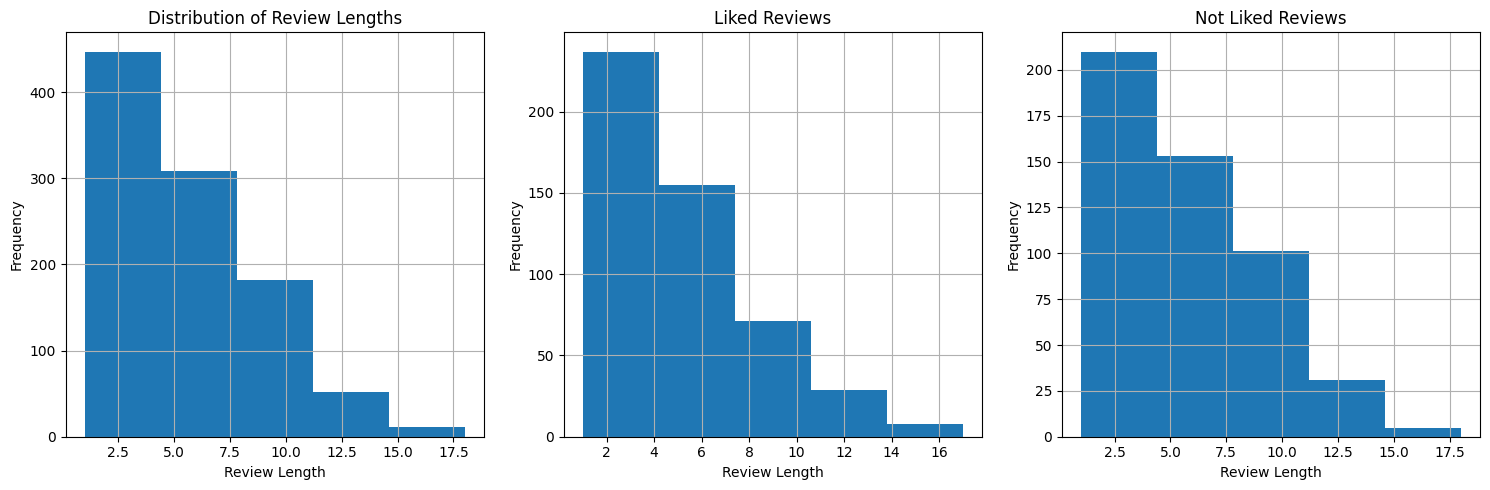

In [17]:
import matplotlib.pyplot as plt

# Create a histogram of review lengths
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Review_Length'].hist(bins=5)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')


plt.subplot(1,3,2)
df.loc[df['Liked'] == 1]['Review_Length'].hist(bins=5)
plt.title('Liked Reviews')
plt.xlabel('Review Length')
plt.ylabel('Frequency')


plt.subplot(1,3,3)
df.loc[df['Liked'] == 0]['Review_Length'].hist(bins=5)
plt.title('Not Liked Reviews')
plt.xlabel('Review Length')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()



# Frequent Keywords in Positive vs. Negative Reviews:
Do certain words signal dissatisfaction (e.g., "cold," "slow," "expensive") while others indicate satisfaction (e.g., "delicious," "friendly," "cozy")?

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.Review)
df_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
df_cv['_Liked'] = df['Liked']

In [19]:
print ("Mostly used words in positive reviews")
positive_words_df = df_cv.loc[df_cv['_Liked']==1].sum().drop('_Liked').sort_values(ascending=False)
print (positive_words_df.head(10))
print ("Mostly used words in negative reviews")
negative_words_df = df_cv.loc[df_cv['_Liked']==0].sum().drop('_Liked').sort_values(ascending=False)
print (negative_words_df.head(10))

Mostly used words in positive reviews
good         73
great        70
place        60
food         60
service      46
time         26
friendly     23
delicious    23
nice         22
really       22
dtype: int64
Mostly used words in negative reviews
food       65
place      51
service    38
time       29
like       29
dont       25
good       22
minute     19
bad        18
got        15
dtype: int64


# Mixed Sentiments:
Are there reviews containing both positive and negative aspects, and how should they be classified?

In [20]:
# ✅ Find common words in both top lists
common_words = set(positive_words_df.head(50).index).intersection(set(negative_words_df.head(50).index))
print ("Common words in top 50 of both positive and negative reviews:")
print(common_words)
print (len(common_words))

Common words in top 50 of both positive and negative reviews:
{'pretty', 'service', 'restaurant', 'star', 'say', 'food', 'definitely', 'experience', 'came', 'good', 'im', 'place', 'time', 'best', 'really', 'like', 'dish'}
17


Mostly used words in positive reviews
good         73
great        70
place        60
food         60
service      46
time         26
friendly     23
delicious    23
nice         22
really       22
dtype: int64
Mostly used words in negative reviews
food       65
place      51
service    38
time       29
like       29
dont       25
good       22
minute     19
bad        18
got        15
dtype: int64


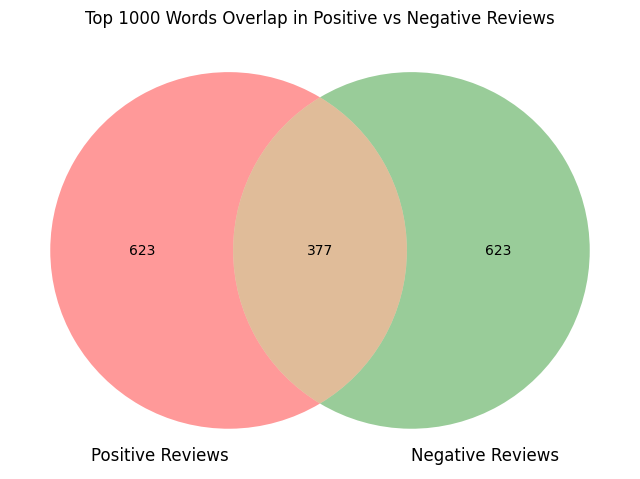

In [21]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Assuming df_cv is your DataFrame and '_Liked' indicates sentiment (1 = positive, 0 = negative)
print("Mostly used words in positive reviews")
positive_words_df = df_cv.loc[df_cv['_Liked'] == 1].sum().drop('_Liked').sort_values(ascending=False)
print(positive_words_df.head(10))

print("Mostly used words in negative reviews")
negative_words_df = df_cv.loc[df_cv['_Liked'] == 0].sum().drop('_Liked').sort_values(ascending=False)
print(negative_words_df.head(10))

# Extract top 10 words from each set
positive_top_words = set(positive_words_df.head(1000).index)
negative_top_words = set(negative_words_df.head(1000).index)

# Create a Venn diagram
plt.figure(figsize=(8,6))
venn2([positive_top_words, negative_top_words],
      set_labels=('Positive Reviews', 'Negative Reviews'))
plt.title('Top 1000 Words Overlap in Positive vs Negative Reviews')
plt.show()


In [22]:
X_train_tfidf = tfidf_vectorizer.fit_transform(df['Review'])
best_classifier.fit(X_train_tfidf, df['Liked'])
coefficients = best_classifier.coef_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()
print (feature_names)
print (coefficients)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

['absolute' 'absolutely' 'absolutley' ... 'yum' 'yummy' 'zero']
[ 0.46975924  0.19698487  0.24103993 ... -0.32500966  0.54014379
 -0.61558124]


In [23]:
top_positive = coef_df.sort_values('Coefficient', ascending=False).head(10)
top_negative = coef_df.sort_values('Coefficient', ascending=True).head(10)
print("\nTop Words Associated with Positive Reviews:")
print(top_positive)

print("\nTop Words Associated with Negative Reviews:")
print(top_negative)


Top Words Associated with Positive Reviews:
        Feature  Coefficient
677       great     2.684790
390   delicious     1.732545
714       happy     1.564422
29      amazing     1.540707
1045       nice     1.432045
1147    perfect     1.364041
918        love     1.343252
554   fantastic     1.340939
85      awesome     1.317255
623    friendly     1.301647

Top Words Associated with Negative Reviews:
            Feature  Coefficient
1729          wasnt    -1.518568
96              bad    -1.477118
1442           slow    -1.438588
995          minute    -1.429883
1058        nothing    -1.285345
150           bland    -1.266399
1193           poor    -1.255929
1340           rude    -1.234882
1779          worst    -1.231673
1666  unfortunately    -1.230129


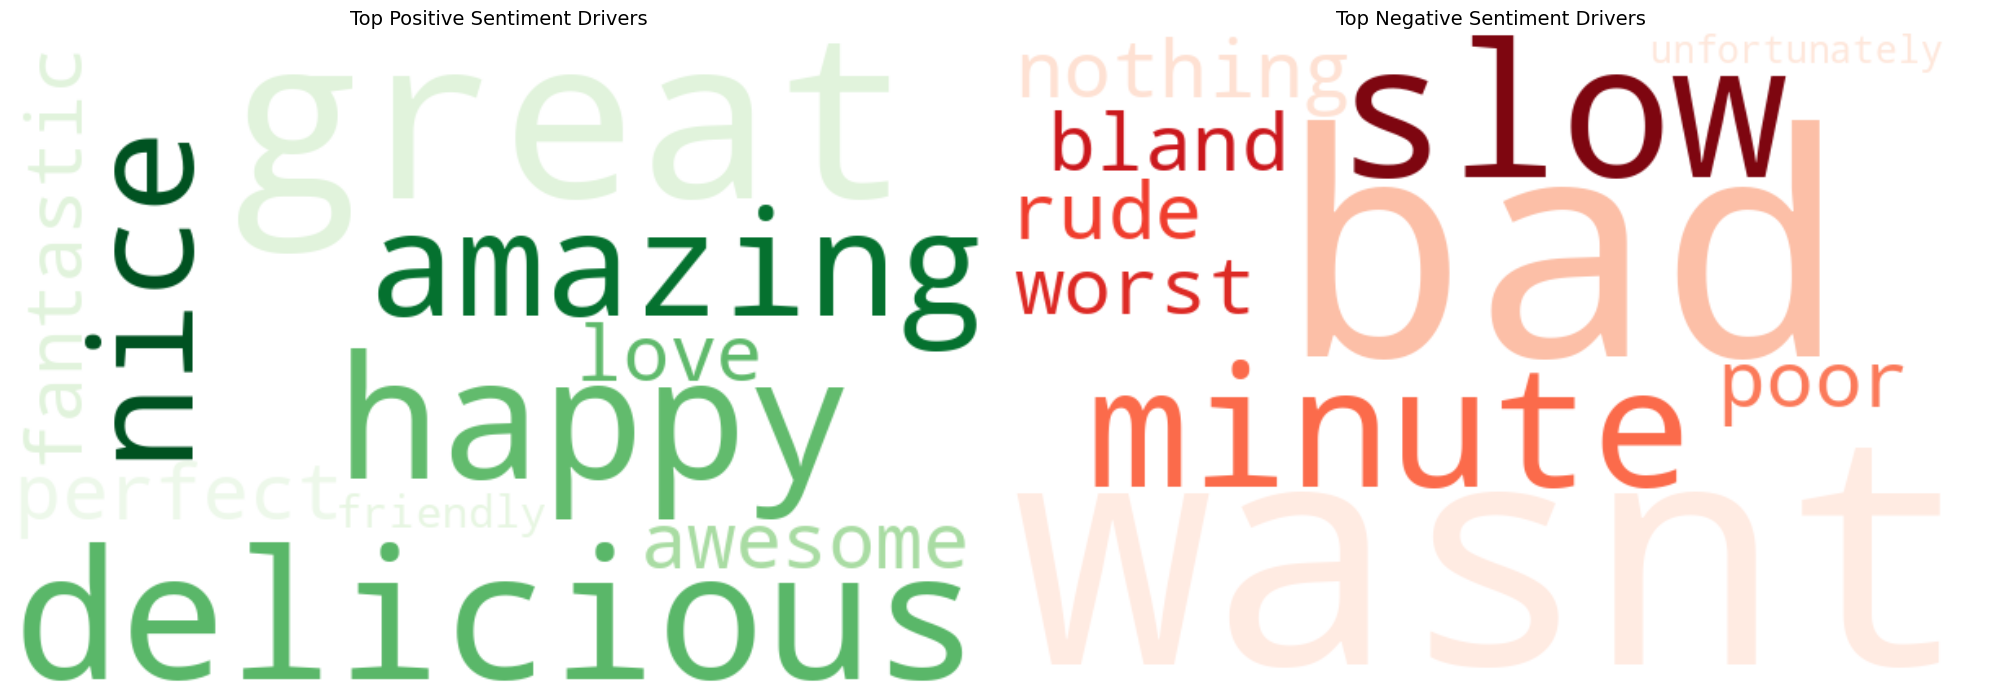

In [24]:
from wordcloud import WordCloud


# Convert your top words to dictionaries with weights
positive_weights = {word: coef for word, coef in zip(top_positive['Feature'], top_positive['Coefficient'])}
negative_weights = {word: abs(coef) for word, coef in zip(top_negative['Feature'], top_negative['Coefficient'])}


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Positive word cloud
pos_wc = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=50
).generate_from_frequencies(positive_weights)
ax1.imshow(pos_wc, interpolation='bilinear')
ax1.set_title("Top Positive Sentiment Drivers", fontsize=14)
ax1.axis('off')

# Negative word cloud
neg_wc = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=50
).generate_from_frequencies(negative_weights)
ax2.imshow(neg_wc, interpolation='bilinear')
ax2.set_title("Top Negative Sentiment Drivers", fontsize=14)
ax2.axis('off')

plt.tight_layout()
plt.show()